>[Examen Diplomatura de Ciencias de Datos (Python)](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=i0zFildainmZ)

>>[Datos del Grupo (Ingrese los datos de los miembros del grupo)](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=DpCP10zljkUr)

>>[Criterio de evaluación](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=aQ3knDmSjoC4)

>>[Herramientas utilizadas](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=ELfqvndSj9Ur)

>>[Problema](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=hXPW4ICqknzA)

>>[Carga de datos](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=9C6E_XIYkFY9)

>>[Preparación de datos](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=QF80Zxg1kIyw)

>>[Análisis](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=zBlq7CMHkTe9)

>>[Visualizaciones](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=Tr34SrWqkWNo)

>>[Persistencia (Almacenamiento)](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=cHHGyZyhkZyU)



# Examen Diplomatura de Ciencias de Datos (Python)

A continuación, se detallan las indicaciones para la resolución del examen. Tengan a bien leer todas las instrucciones y no dude en consultar si tiene alguna duda.

1. El examen se realiza de forma grupal de acuerdo a la asignación previamente realizada (Grupo 1, Grupo 2, Grupo 3, Grupo 4, Grupo 5, Grupo 6)
2. La fecha de entrega es el Lunes 10 de Mayo a las 9:00 AM hs (Argentina). La entrega se deberá realizar por correo electrónico.
3. Tanto el código como el análisis y las visualizaciones se deben entregan en un notebook en formato **.ipynb**
4. Puede utilizar diferentes herramientas para el desarrollo como Jupyter, Colab, Spypder o VSCodium, sin embargo, el trabajo final debe ser entregado en un notebook como estipulado en el punto 3.
5. Para visualizaciones se debe utilizar la librería **matplotlib** solamente.
6. La defensa del trabajo se realizará el Lunes 10 de Mayo a las 18:30 hs de forma grupal. Se les brindará un espacio de 20 minutos para la exposición y espacio a preguntas.
7. La nota se obtendrá en base a un promedio entre el desarrollo del trabajo, defensa del mismo en forma grupal y exposición individual. 
8. Los archivos a utilizar se encuentran almacenados en la siguientes URL:

https://github.com/al34n1x/DataScience/blob/master/100.Examen/examen_births.csv

https://github.com/al34n1x/DataScience/blob/master/100.Examen/examen_life_expectancy.csv

---




## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre y Apellido | LU
------------------|---



## Criterio de evaluación

Se les brindará dos archivos los cuales deben ser importados y proceder a trabajar con los mismos aplicando los conceptos de explicados en clase.

Como parte del examen se evaluarán los siguientes conceptos:

* Importar datos desde fuentes externas
* Preparación de datos en estructuras tipo diccionarios/arreglos 
* Gestión de datos
* Visualizaciones
* Almacenamiento de resultados


---


## Herramientas utilizadas


En el presente trabajo utilizamos las herramientas de Python aprendidas en clase tales como definición de funciones, utilización de diccionarios y listas, procesos mediante bucles e iteraciones como asi también las herramientas de visualización de datos tales como matploblib.


---

## Problema

El ayuntamiento de Barcelona le ha solicitado al equipo de científicos de datos realizar un análisis sobre la expectativa de vida y el nivel de natalidad en cada uno de los distritos de la comunidad.
Para ello les requieren:

* Cargar los datos provistos en formato CSV en estructuras de diccionarios.
* Para cada distrito obtener el promedio de expectativa de vida, discriminado por genero.
* Obtener el/los distritos con mayor y menor natalidad respectivamente.
* Realizar una comparación entre los distritos con mayor expectativa de vida y su nivel de natalidad
* Generar visualizaciones que muestren los resultados como parte del análisis.
* Desarrollar una conclusión sobre el análisis. 
* Almacenar los resultados en archivos en formato CSV.



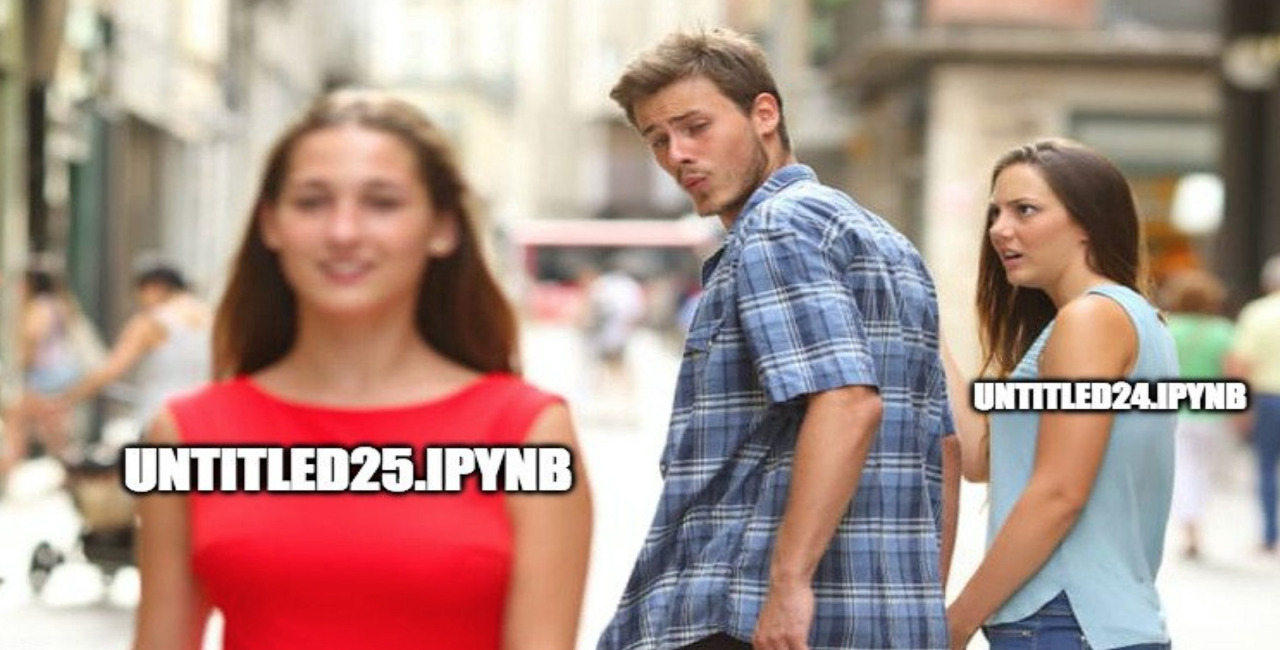

---

**RESOLUCIÓN**

---




**CARGA DE DATOS**

Importamos las librerías, que serán utilizadas en el transcurso del ejercicio  y nos conectamos a Google Drive.

In [ ]:
# Importamos Librerías 
import csv
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**DECISIONES TOMADAS**

Inicializamos las variables que contendrán los datos procesados, life_expectancy y dic_datos con la siguiente estructura de diccionarios. 


```
life_expectancy = {
  'district_name': {
    'Neighborhood': string,
    'expectativa_prom':float,
    'Gender': string,
    'representative': string ('yes' or 'no')
  }
}
```



Se cargan los datos del archivo csv tomando las decisiones siguientes: 

*   Cargamos los valores de expectativas de vida como float para uniformarlos y en caso que la columna esté vacía se le asigna 0.0

*   Si no hay información sobre expectativa de vida en ninguno de los rangos de fechas, consideramos que el barrio no es representativo para el análisis por lo tanto agregamos un flag en el diccionario.
*   Tomamos la expectativa de vida promedio para cada barrio, ignorando los valores en 0.



In [ ]:
life_expectancy = {}
dic_datos = {}


with open('./gdrive/MyDrive/Uade/1er_Bimestre_Parcial/examen_life_expectancy.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter= ';')
    for row in csv_reader:
            District_Name = row ['District Name']

            Neighborhood = row ['Neighborhood']
            #si alguna columna de expectativa de vida esta vacio, le asignamos 0, para luego trabajarlo
            range_2006_2010 = float(row['2006-2010']) if row['2006-2010'] else 0.0 
            
            range_2007_2011 = float(row['2007-2011']) if row['2007-2011'] else 0.0
            range_2008_2012 = float(row['2008-2012']) if row['2008-2012'] else 0.0
            range_2009_2013 = float(row['2009-2013']) if row['2009-2013'] else 0.0
            range_2010_2014 = float(row['2010-2014']) if row['2010-2014'] else 0.0
            Gender = row ['Gender']
            #si las 5 columnas de expectativa de vida estan en 0 el barrio no es representativo, por lo tanto lo dejamos marcado en el diccionario
            representative = 'no' if range_2006_2010 == 0.0 and range_2007_2011 == 0.0 and range_2008_2012 == 0.0 and range_2009_2013 == 0.0 and range_2010_2014 == 0.0 else 'yes'

            #creamos un array de Numpy con todos los valores de expectativa de vida
            lista_expectativa = np.array([range_2006_2010,range_2007_2011,range_2008_2012,range_2009_2013,range_2010_2014])
            
            
            #la expectativa de vida promedio para cada barrio, ignorando los valores en 0
            lista_expectativa[lista_expectativa == 0] = np.nan  #nan not a number. 
            expectativa = np.nanmean(lista_expectativa)  #np.nanmean ignora los nans
            
            #creamos el diccionario anidado dic_datos

            dic_datos = {'Neighborhood':Neighborhood,
                         'expectativa_prom':expectativa,
                         'Gender':Gender,
                         'representative': representative
                         }

            if District_Name in life_expectancy:
                life_expectancy[District_Name].append(dic_datos)
            else:
                life_expectancy[District_Name] = []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice


Inicializamos las variables births_per_district y dic_datos 
que contendrán los datos procesados,  con la siguiente estructura de diccionarios.
```
{'District_Code': 
  District_Code,
                    'Year':Year,
                    'Neighborhood_Code':Neighborhood_Code,
                    'Neighborhood_Name':Neighborhood_Name,
                    'Gender':Gender,
                    'births':births
                    }

```




Se cargan los datos del archivo csv tomando las decisiones siguientes: 

*   Ignoramos los registros "No consta" porque no tienen distrito asignado y esto los vuelve irrelevantes para nuestro análisis.

*  Reemplazamos el valor "Boys" por Male y "Girls" por Female para unificar los datos de ambos diccionarios para una posterior comparación.



In [ ]:
births_per_district = {}
dic_datos = {}

with open('./gdrive/MyDrive/Uade/1er_Bimestre_Parcial/examen_births.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter= ';')
    for row in csv_reader:
      if row['District Name'] == "No consta": # Ignoramos estos registros porque no tienen distrito asignado y esto los vuelve irrelevantes para nuestro analisis
        continue
      District_Name = row ['District Name']
      District_Code = row ['District Code']
      Year = row ['Year']
      Neighborhood_Code = row ['Neighborhood Code']
      Neighborhood_Name = row ['Neighborhood Name']
      Gender = 'Male' if row ['Gender'] == 'Boys' else 'Female' #Reemplazamos el valor "Boys" por Male y "Girls" por Female para unificar los datos de ambos diccionarios
      births = int(row['Number']) if row['Number'] else 0



      dic_datos = {'District_Code': District_Code,
                    'Year':Year,
                    'Neighborhood_Code':Neighborhood_Code,
                    'Neighborhood_Name':Neighborhood_Name,
                    'Gender':Gender,
                    'births':births
                    }

      if District_Name in births_per_district:
          births_per_district[District_Name].append(dic_datos)
      else:
          births_per_district[District_Name] = []



**PREPARACIÓN DE DATOS** 

Para cada distrito obtenemos el promedio de expectativa de vida, abierto por genero y considerando solo los datos representativos. 
Asimismo redondeamos el resultado a dos dígitos.
La función devuelve un diccionario con la siguiente estructura:

```
{"District_Name":
{
        'male': avg_male,
        'female': avg_female
    }
}  
```

**DEFINICIÓN DE FUNCIONES**

In [ ]:
def calcular_promedio_distritos(distritos): #función promedio
  avg_by_district = dict()
  for distrito in distritos:
    barrios = distritos[distrito]
    female_expectative = []
    male_expectative = []
    for barrio in barrios:
      if barrio['representative'] == 'yes':
        if barrio['Gender'] == 'Female':
          female_expectative.append(barrio['expectativa_prom'])
        else:
          male_expectative.append(barrio['expectativa_prom'])
    avg_female = round(np.average(female_expectative), 2) #redondeamos a dos dígitos
    avg_male = round(np.average(male_expectative), 2)
    avg_by_district[distrito] = {
        'male': avg_male,
        'female': avg_female
    }
  return avg_by_district






Creamos la función suma_nacimientos_por_distrito que recibe un diccionario con los nacimientos por barrio por distrito y devuelve un diccionario con el total de nacimientos por distrito abierto por género.



In [ ]:
#births_per_district borrar

def suma_nacimiento_por_distrito(nac_por_distrito):
  nac_by_district = dict()

  for distrito in nac_por_distrito:
    nacimientos_m = 0  #se inicializan las variables para empezar cada ciclo
    nacimientos_f = 0
    for barrio in nac_por_distrito[distrito]:
      if barrio['Gender'] == 'Female':
        nacimientos_f += barrio['births']
      else:
        nacimientos_m += barrio['births']
    nac_by_district[distrito] = {
        'male': nacimientos_m,
        'female': nacimientos_f
    }
  return nac_by_district




Creamos la función obtener_nac_max_y_min que recibe un diccionario con el total de nacimientos por distrito abierto por género y devuelve un diccionario con los distritos de mayor y menor cantidad de nacimientos, respectivamente.
Para ello, calculamos el total sumando ambos géneros de cada distrito.

In [ ]:
def obtener_nac_max_y_min(nac_por_distrito):
  max_nac = 0  #se inicializa la variable en 0
  nombre_distrito_max = ""
  min_nac = float("inf") # infinito
  nombre_distrito_min = ""
  for distrito in nac_por_distrito:
    male = nac_por_distrito[distrito]['male']      #asignamos a la variable 'male' el valor para el distrito a comparar
    female = nac_por_distrito[distrito]['female']  #asignamos a la variable 'female' el valor para el distrito a comparar

    total = male + female  #sumarizamos las dos variables para tener el resultado total de nacimientos
    if total > max_nac:  #comparamos el total del distrito contra la cota máxima de nacimientos
      max_nac = total  
      nombre_distrito_max = distrito
    if total < min_nac:   #comparamos el total del distrito contra la cota mínima de nacimientos
      min_nac = total
      nombre_distrito_min = distrito

  return {'max_nacimientos': {'distrito':nombre_distrito_max, 'nacimientos': max_nac}, 'min_nacimientos': {'distrito': nombre_distrito_min, 'nacimientos': min_nac}}


**COMPARATIVO DISTRITOS CON MAYOR EXPECTATIVA DE VIDA Y NATALIDAD**

Se define una función que posibilita integrar los dos archivos ingresados con el objeto de poder hacer comparaciones utilizando elementos de ambos.

In [ ]:
def merge_nacimientos_expectativa(expectativa,nacimientos):
  dic_merge = {}
  for distrito,valor in expectativa.items():
    expectativa_total = round((valor.get('female') + valor.get('male'))/2,2)
    nacimientos_total = int(nacimientos[distrito].get('female'))+int(nacimientos[distrito].get('male'))
    dic_merge[distrito] = {
        'expectativa': expectativa_total,
        'nacimientos': nacimientos_total
        }

  return dic_merge

def top_n(dic,campo,n):
  return dict(sorted(dic.items(), key=lambda item: item[1][campo],reverse=True)[:n])

**Funciones de Persistencia**

Se define la función para guardar diccionarios en CSV

In [ ]:
#Recibe como parametro el diccionario y el nombre del archivo donde guardar el mismo
def grabo_dic_csv(diccionario,archivo):
  with open('./sample_data/'+archivo+'.csv', mode='w') as csv_file:
      fieldnames = list(diccionario.keys())
      writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

      writer.writeheader()
      #itero en un ciclo for recorriendo el diccionario recibido por parametro y a cada clave le asigno el valor del diccionario
      writer.writerow(diccionario)


Grabo_dic_anidado_csv: 
Toma un diccionario anidado con la estructura: {​distrito: {​male:x, female:y}​ y genera nuevo diccionario con las keys distrito, male y female


In [ ]:
def grabo_dic_anidado_csv(diccionario,archivo):
  lista = []
  with open('./sample_data/'+archivo+'.csv', mode='w') as csv_file:
    
    keys = diccionario.keys()
    
    for k in keys:
      dato = {'distrito': k}
      #incorporo las claves del diccionario anidado a un diccionario nuevo que se almacenara en una lista
      dato.update(diccionario[k])
      lista.append(dato)

    #los nombres de las columnas en base a las keys del primer dic
    fieldnames = list(lista[0].keys())

    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    #itero en un ciclo for recorriendo la lista que contiene el dic generado y a cada clave le asigno el valor
    for v in lista:
      writer.writerow(v)

              

## Análisis

* Para cada distrito obtener el promedio de expectativa de vida, discriminado por genero.
* Obtener el/los distritos con mayor y menor natalidad respectivamente.
* Realizar una comparación entre los distritos con mayor expectativa de vida y su nivel de natalidad
* Generar visualizaciones que muestren los resultados como parte del análisis.
* Desarrollar una conclusión sobre el análisis. 
* Almacenar los resultados en archivos en formato CSV.

## Diccionarios de entrada para las funciones:

**life_expectancy: Expectativa de vida**

**births_per_district: Nacimientos**

In [ ]:
#invocamos a la funcion que nos calculará el promedio de vida por distrito y genero
expectativa_promedio = calcular_promedio_distritos(life_expectancy)

expectativa_promedio

{'Ciutat Vella': {'female': 85.95, 'male': 77.78},
 'Eixample': {'female': 86.91, 'male': 80.64},
 'Gràcia': {'female': 86.89, 'male': 80.32},
 'Horta-Guinardó': {'female': 86.1, 'male': 80.07},
 'Les Corts': {'female': 87.99, 'male': 82.55},
 'Nou Barris': {'female': 85.43, 'male': 77.8},
 'Sant Andreu': {'female': 87.07, 'male': 79.78},
 'Sant Martí': {'female': 87.01, 'male': 80.7},
 'Sants-Montjuïc': {'female': 86.74, 'male': 80.76},
 'Sarrià-Sant Gervasi': {'female': 87.45, 'male': 81.32}}

In [ ]:
#Invocamos a la función que nos calculará los nacimientos por distrito y género.

nacimientos_por_distrito = suma_nacimiento_por_distrito(births_per_district)

#La función obtener_nac_max_y_min nos brindará los distritos con mayor y menor nacimientos
obtener_nac_max_y_min(nacimientos_por_distrito)



{'max_nacimientos': {'distrito': 'Eixample', 'nacimientos': 10240},
 'min_nacimientos': {'distrito': 'Les Corts', 'nacimientos': 2928}}

In [ ]:
#Invocamos a la función que nos unirá los datos de nacimientos y expectativa promedio para cada distrito
info_distritos = merge_nacimientos_expectativa(expectativa_promedio,nacimientos_por_distrito)

#Obtenemos el top 5 distritos por expectativa de vida
top_expectativa = top_n(info_distritos,'expectativa',5)

print(top_expectativa)

{'Les Corts': {'expectativa': 85.27, 'nacimientos': 2928}, 'Sarrià-Sant Gervasi': {'expectativa': 84.38, 'nacimientos': 6473}, 'Sant Martí': {'expectativa': 83.86, 'nacimientos': 10220}, 'Eixample': {'expectativa': 83.78, 'nacimientos': 10240}, 'Sants-Montjuïc': {'expectativa': 83.75, 'nacimientos': 7343}}


## Visualizaciones

<Introducir proceso/comentarios aquí>

Suma histórica de nacimientos por Distritos ordenado de mayor a menor

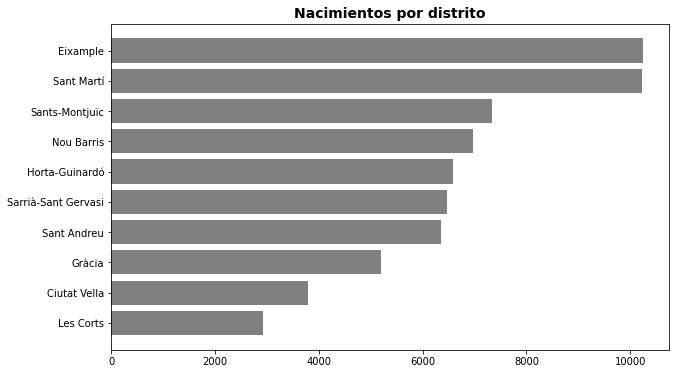

In [ ]:
import matplotlib.pyplot as plt

barrios = {}
for key,vals in nacimientos_por_distrito.items():
    valores = 0
    valores = (nacimientos_por_distrito[key].get('female')+(nacimientos_por_distrito[key].get('male')))
    barrios[key] = valores


barrios = {k: v for k, v in sorted(barrios.items(), key=lambda item: item[1])}

fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
ax.barh(list(barrios.keys()), list(barrios.values()),color = 'gray')
ax.set_title('Nacimientos por distrito', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})



plt.show()

Share Nacimientos por género para cada distrito. Se incorpora una linea de referencia al 50%

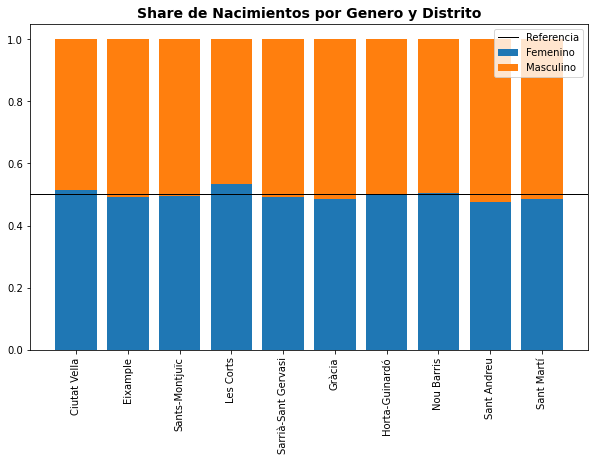

In [ ]:
import matplotlib.pyplot as plt

barrios = {}
labels = []
for key,vals in nacimientos_por_distrito.items():
    valores = []
    valores.append(nacimientos_por_distrito[key].get('female')/(nacimientos_por_distrito[key].get('male')+nacimientos_por_distrito[key].get('female')))
    valores.append(nacimientos_por_distrito[key].get('male')/(nacimientos_por_distrito[key].get('male')+nacimientos_por_distrito[key].get('female')))
    barrios[key] = valores

c = []
v = []             
for key, val in barrios.items():
    c.append(key)
    v.append(val)

v = np.array(v)
barWidth = 0.85
fig = plt.figure(figsize=(10,6))
grafico = fig.subplots()
grafico.set_title('Share de Nacimientos por Genero y Distrito', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

grafico.set_xticklabels(labels)


plt.xticks(rotation='vertical')

plt.axhline(y=0.5,linewidth=1, color='k',label = 'Referencia')


plt.bar(range(len(c)), v[:,0],label = 'Femenino')
plt.bar(range(len(c)), v[:,1], bottom=v[:,0],label = 'Masculino')
plt.xticks(range(len(c)), c)
grafico.legend()
plt.show()


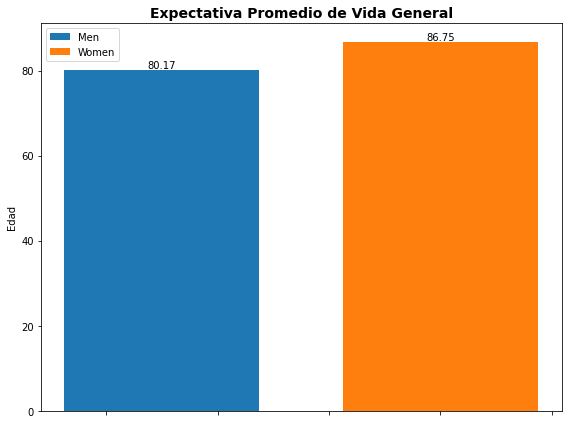

In [ ]:
from matplotlib.pyplot import figure

labels = []
women_means = []
men_means = []
for key,vals in expectativa_promedio.items():
    women_means.append(expectativa_promedio[key].get('female'))
    men_means.append(expectativa_promedio[key].get('male'))
    


width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(1.5, np.average(men_means), width, label='Men')
rects2 = ax.bar(2, np.average(women_means), width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Edad')
ax.set_title('Expectativa Promedio de Vida General',fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation='vertical')


for bar in rects1:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{round(height,2)}', ha='center',
  va='bottom')



for bar in rects2:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{round(height,2)}', ha='center',
  va='bottom')


fig.tight_layout()

plt.show()

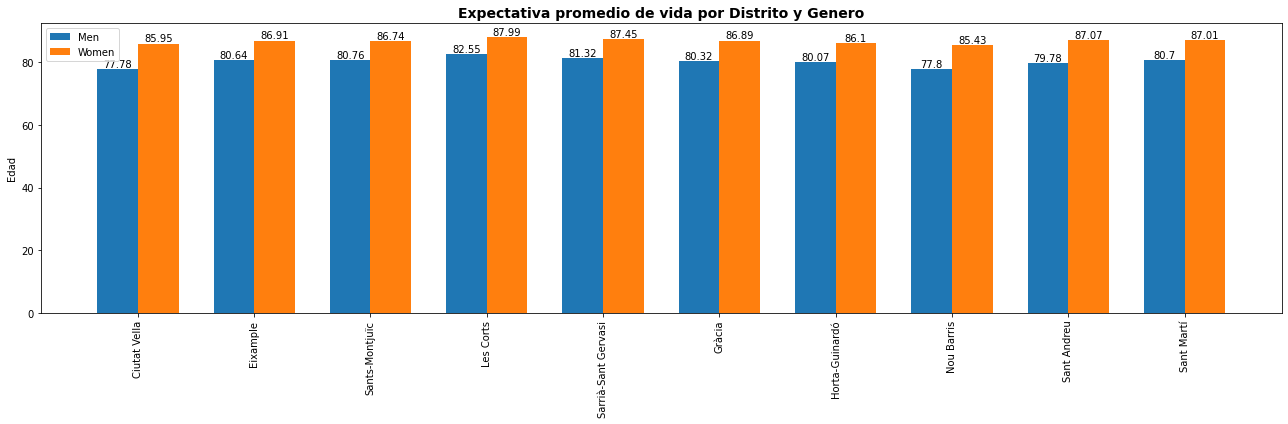

In [ ]:
from matplotlib.pyplot import figure

labels = []
women_means = []
men_means = []
for key,vals in expectativa_promedio.items():
    labels.append(key)
    #valores = []
    women_means.append(expectativa_promedio[key].get('female'))
    men_means.append(expectativa_promedio[key].get('male'))
    

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18,6))
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Edad')
ax.set_title('Expectativa promedio de vida por Distrito y Genero',fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation='vertical')

for bar in rects1:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{round(height,2)}', ha='center',
  va='bottom')

for bar in rects2:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{round(height,2)}', ha='center',
  va='bottom')

fig.tight_layout()

plt.show()

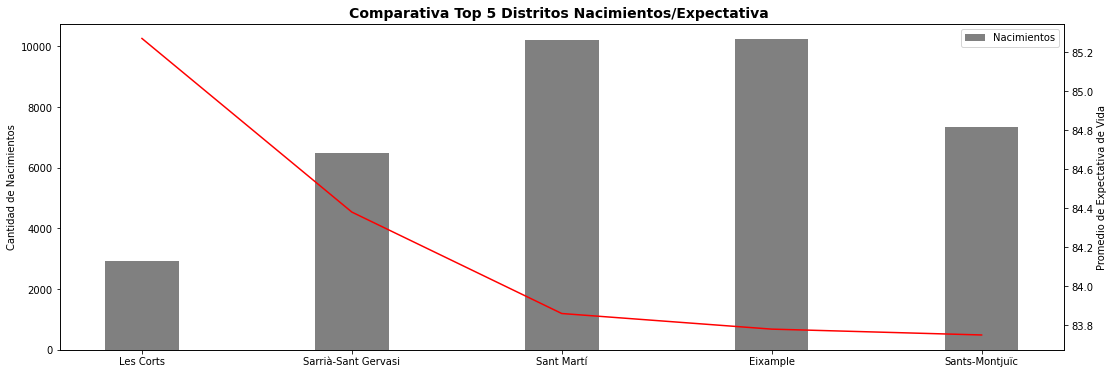

In [ ]:
labels = []
expectativa_means = []
nacimientos_means = []
for key,vals in top_expectativa.items():
    labels.append(key)
    #valores = []
    expectativa_means.append(top_expectativa[key].get('expectativa'))
    nacimientos_means.append(top_expectativa[key].get('nacimientos'))


fig, ax = plt.subplots(figsize=(18,6))       

width = 0.35       # the width of the bars

ind = np.arange(len(labels))

plt.bar(ind, nacimientos_means, width, color='gray', label='Nacimientos')
plt.ylabel('Cantidad de Nacimientos')      

x = ind
y = expectativa_means
axes2 = plt.twinx()
axes2.plot(x, y, color='red', label='Expectativa de Vida')

axes2.set_ylabel('Promedio de Expectativa de Vida')

ax.set_title('Comparativa Top 5 Distritos Nacimientos/Expectativa ',fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation='vertical')

plt.show()

## Conclusiones

*   El gráfico **Nacimientos por Distrito** nos muestra que los distritos que más nacimientos presentan son **Eixample** y **Sant Martí**, con más de 10.000 entre el 2013 y 2017, respectivamente. Mientras que, **Les Corts** es el que menos posee, con 2.928 nacimientos.
    
    *Validando estos resultados en Wikipedia, notamos que los distritos que más nacimientos presentan también poseen mayor población. Por el contrario, el distrito que presenta menos nacimientos, posee menos población.*
*   El gráfico **Share de Nacimientos por Genero y Distrito**  nos muestra que la distribución de nacimientos por género no presenta variación significativa.
*   El gráfico **Expectativa Promedio de Vida General** nos muestra que en promedio la expectiva de vida de las mujeres es seis años mayor a la expectiva de vida de los hombres. Visualizando la apertura a nivel distrito, vemos que la tendencia se mantiene (gráfico **Expectativa promedio de vida por Distrito y Genero**).
*  Por último, el gráfico **Comparativa Top 5 Distritos Nacimientos/Expectativa** nos muestra que aquellos distritos con menos nacimientos presentan expectativa de vida más alta. Por otro lado, quienes presentan mayor cantidad de nacimientos, la expectativa es más baja. Sin embargo, entendemos que la muestra no nos permite obtener más conclusiones relacionando las variables. 



##Persistencia


In [ ]:
#Se almancenan los diccionarios utilizados
grabo_dic_anidado_csv(nacimientos_por_distrito, "Total_nacimiento_por_distrito")
 
grabo_dic_anidado_csv(expectativa_promedio, "Promedio_expectativa_de_vida_por_distrito")
